# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from collections import Counter

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Memuat Dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/dataset.csv')
df.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Melihat Informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


In [5]:
# Rename column
df.rename(columns={"peng": "belanja"}, inplace=True)

In [6]:
# Mengecek data yang hilang (Missing values)
df.isnull().sum()

,0
provinsi,0
daerah,0
jenis,0
tahun,0
belanja,108


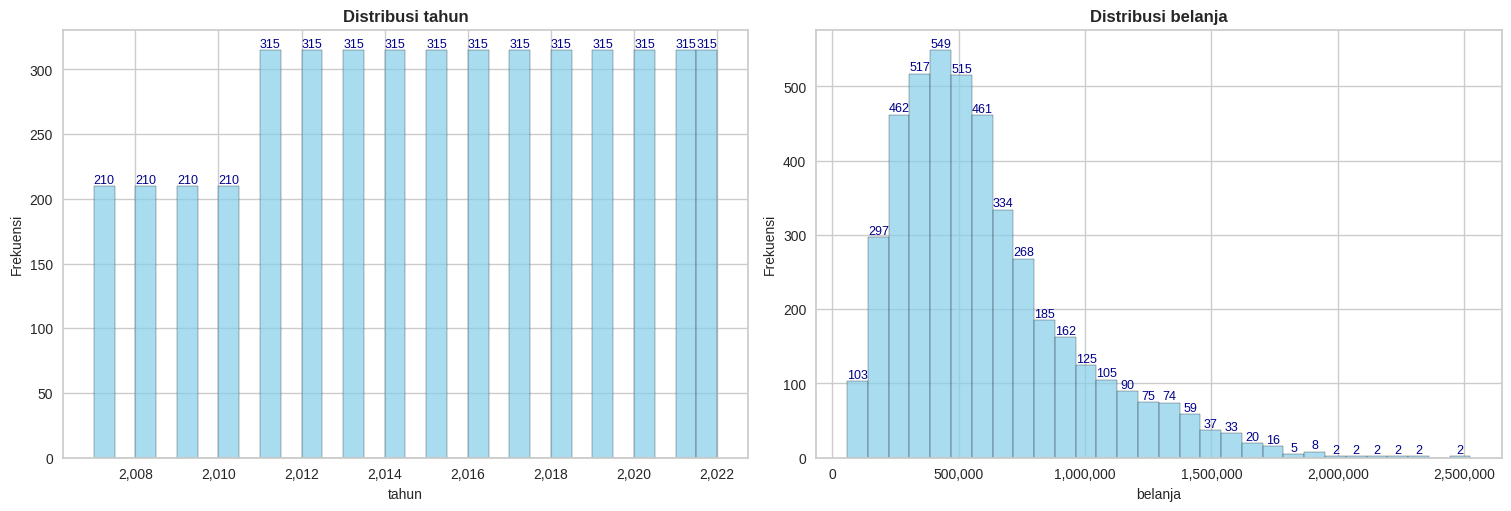

In [7]:
# Ambil kolom numerik
num_cols = df.select_dtypes(include=['number']).columns

# Buat subplot
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5), constrained_layout=True)

if len(num_cols) == 1:
    axes = [axes]  # Pastikan axes berupa list jika hanya 1 kolom

# Loop untuk membuat histogram setiap kolom numerik
for col, ax in zip(num_cols, axes):
    # Plot histogram
    counts, bins, patches = ax.hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')

    # Tambahkan angka di atas setiap bar
    for count, bin_edge in zip(counts, bins):
        if count > 0:
            ax.text(bin_edge + (bins[1] - bins[0]) / 2, count, f'{int(count)}',
                    ha='center', va='bottom', fontsize=9, color='darkblue')

    # Set judul
    ax.set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frekuensi', fontsize=10)

    # Format angka agar lebih mudah dibaca
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Tampilkan plot
plt.show()

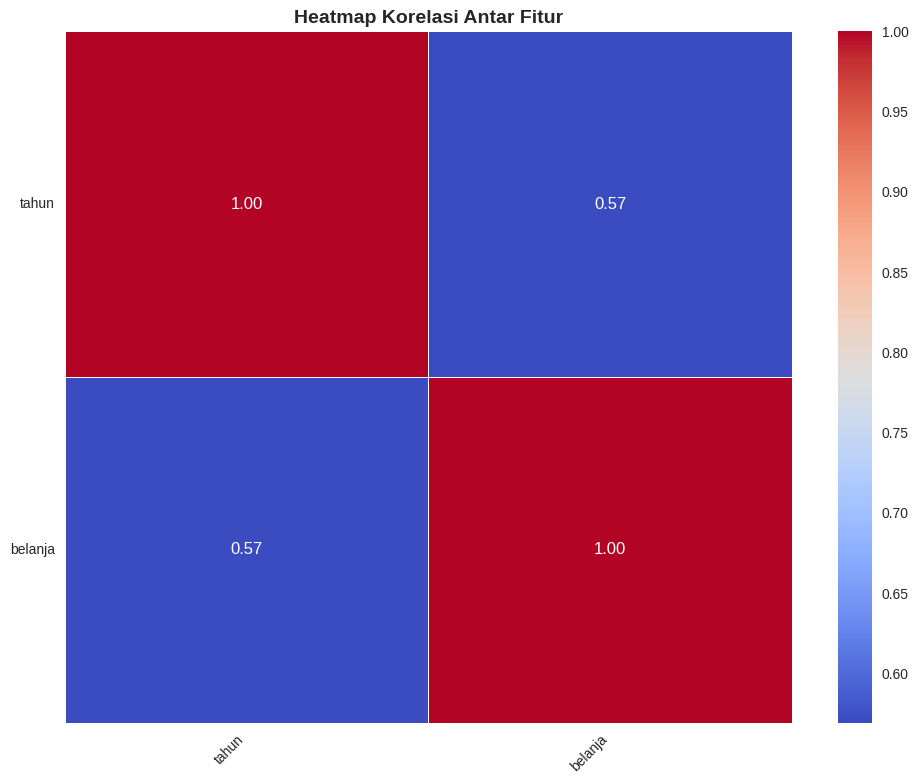

In [8]:
# Ambil kolom numerik
num_cols = df.select_dtypes(include=['number'])

# Hitung matriks korelasi
correlation_matrix = num_cols.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Judul dan pengaturan
plt.title("Heatmap Korelasi Antar Fitur", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

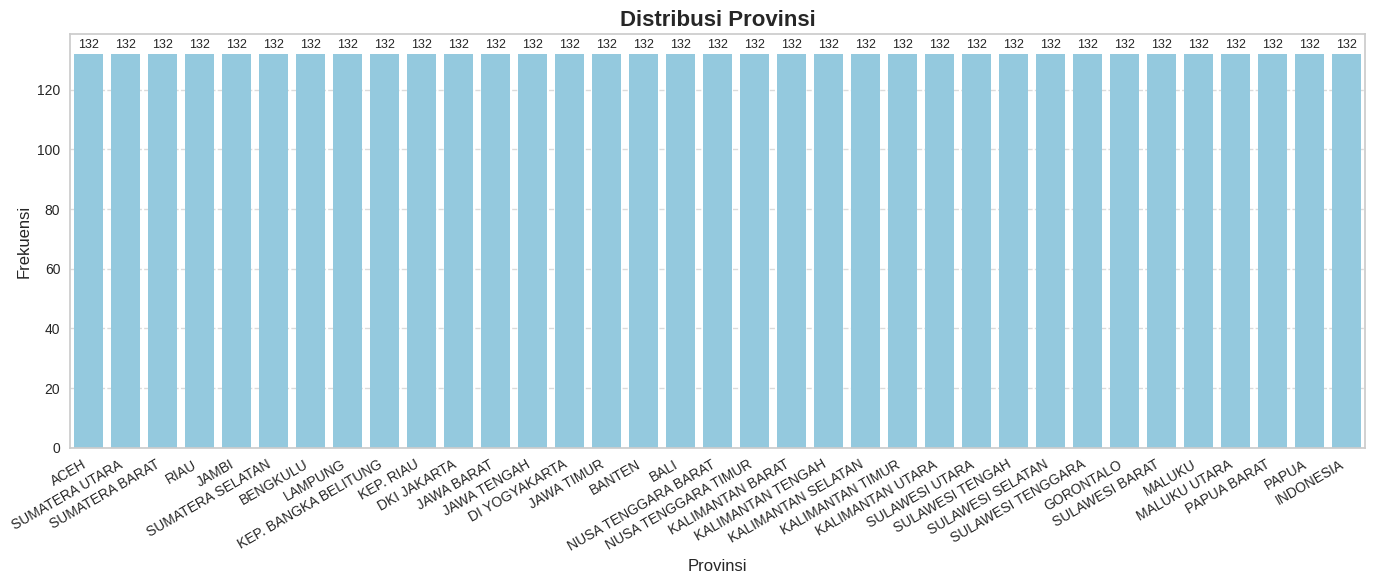

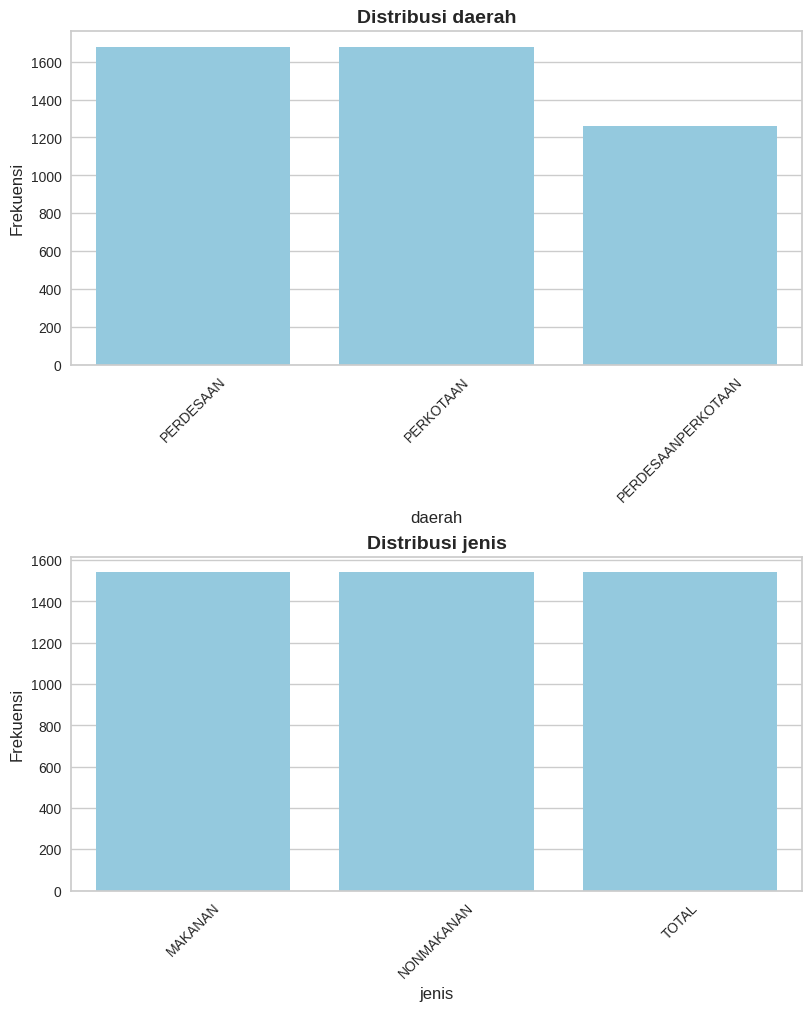

In [9]:
# Membuat visualisasi distribusi data kategorikal
plt.figure(figsize=(14, 6))
provinsi_counts = df['provinsi'].value_counts()
sns.barplot(x=provinsi_counts.index, y=provinsi_counts.values, color='skyblue')
plt.xticks(rotation=30, ha='right', fontsize=10)

# Tambahkan judul dan label
plt.title('Distribusi Provinsi', fontsize=16, fontweight='bold')
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(provinsi_counts.values):
    plt.text(i, value + 2, f'{value}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Get categorical columns before filtering
cat_cols = df.select_dtypes(include=['object']).columns
filtered_cat_cols = [col for col in cat_cols if col != 'provinsi']

fig, axes = plt.subplots(
    nrows=len(filtered_cat_cols),
    ncols=1,
    figsize=(8, 5 * len(filtered_cat_cols)),
    constrained_layout=True
)

if len(filtered_cat_cols) == 1:
    axes = [axes]

for col, ax in zip(filtered_cat_cols, axes):
    sns.countplot(data=df, x=col, ax=ax, color='skyblue', order=df[col].value_counts().index)
    ax.set_title(f'Distribusi {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frekuensi', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.show()

<ipython-input-10-98db835d36a6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


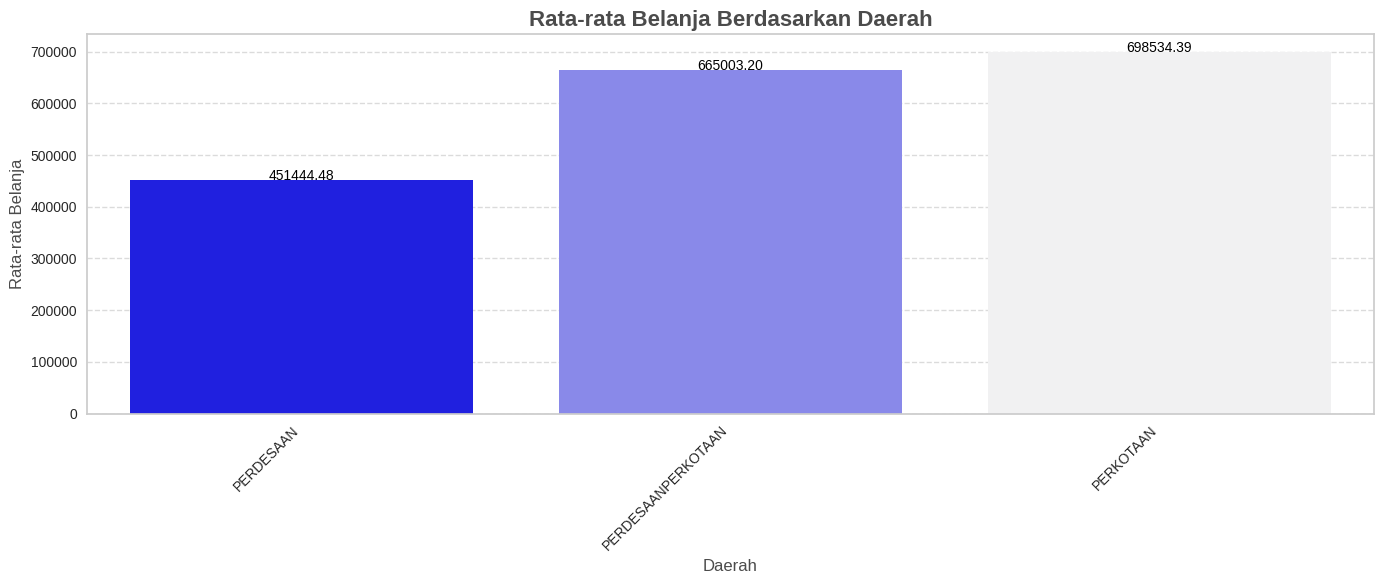

<ipython-input-10-98db835d36a6>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


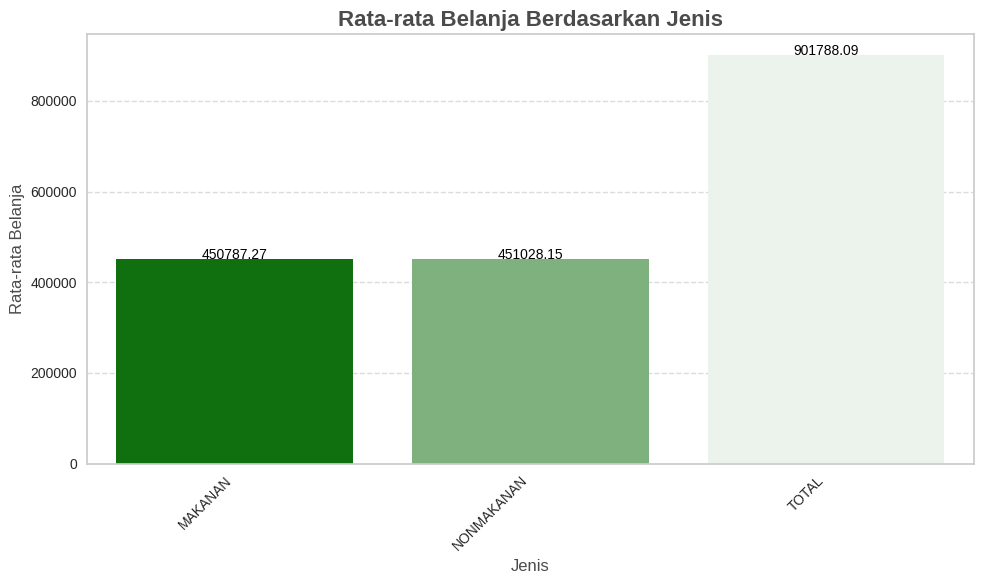

In [10]:
# Calculate average 'belanja' for each 'daerah' and 'jenis'
avg_belanja_daerah = df.groupby('daerah')['belanja'].mean().reset_index()
avg_belanja_daerah = avg_belanja_daerah.rename(columns={'belanja': 'rata_rata_belanja'})

avg_belanja_jenis = df.groupby('jenis')['belanja'].mean().reset_index()
avg_belanja_jenis = avg_belanja_jenis.rename(columns={'belanja': 'rata_rata_belanja'})

# Visualisasi rata-rata belanja berdasarkan daerah
plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_belanja_daerah,
    x='daerah',
    y='rata_rata_belanja',
    palette=sns.light_palette("blue", n_colors=len(avg_belanja_daerah), reverse=True)
)
plt.title('Rata-rata Belanja Berdasarkan Daerah', fontsize=16, fontweight='bold', color='#4B4B4B')
plt.xlabel('Daerah', fontsize=12, color='#4B4B4B')
plt.ylabel('Rata-rata Belanja', fontsize=12, color='#4B4B4B')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas setiap bar
for index, row in avg_belanja_daerah.iterrows():
    plt.text(
        x=index,
        y=row['rata_rata_belanja'] + 0.5,
        s=f"{row['rata_rata_belanja']:.2f}",
        ha='center',
        color='black',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Visualisasi rata-rata belanja berdasarkan jenis
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_belanja_jenis,
    x='jenis',
    y='rata_rata_belanja',
    palette=sns.light_palette("green", n_colors=len(avg_belanja_jenis), reverse=True)
)
plt.title('Rata-rata Belanja Berdasarkan Jenis', fontsize=16, fontweight='bold', color='#4B4B4B')
plt.xlabel('Jenis', fontsize=12, color='#4B4B4B')
plt.ylabel('Rata-rata Belanja', fontsize=12, color='#4B4B4B')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas setiap bar
for index, row in avg_belanja_jenis.iterrows():
    plt.text(
        x=index,
        y=row['rata_rata_belanja'] + 0.5,
        s=f"{row['rata_rata_belanja']:.2f}",
        ha='center',
        color='black',
        fontsize=10
    )

plt.tight_layout()
plt.show()

<ipython-input-11-a2aa4511e483>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=pengeluaran_provinsi.head(10).index,
<ipython-input-11-a2aa4511e483>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=pengeluaran_provinsi.tail(10).index,


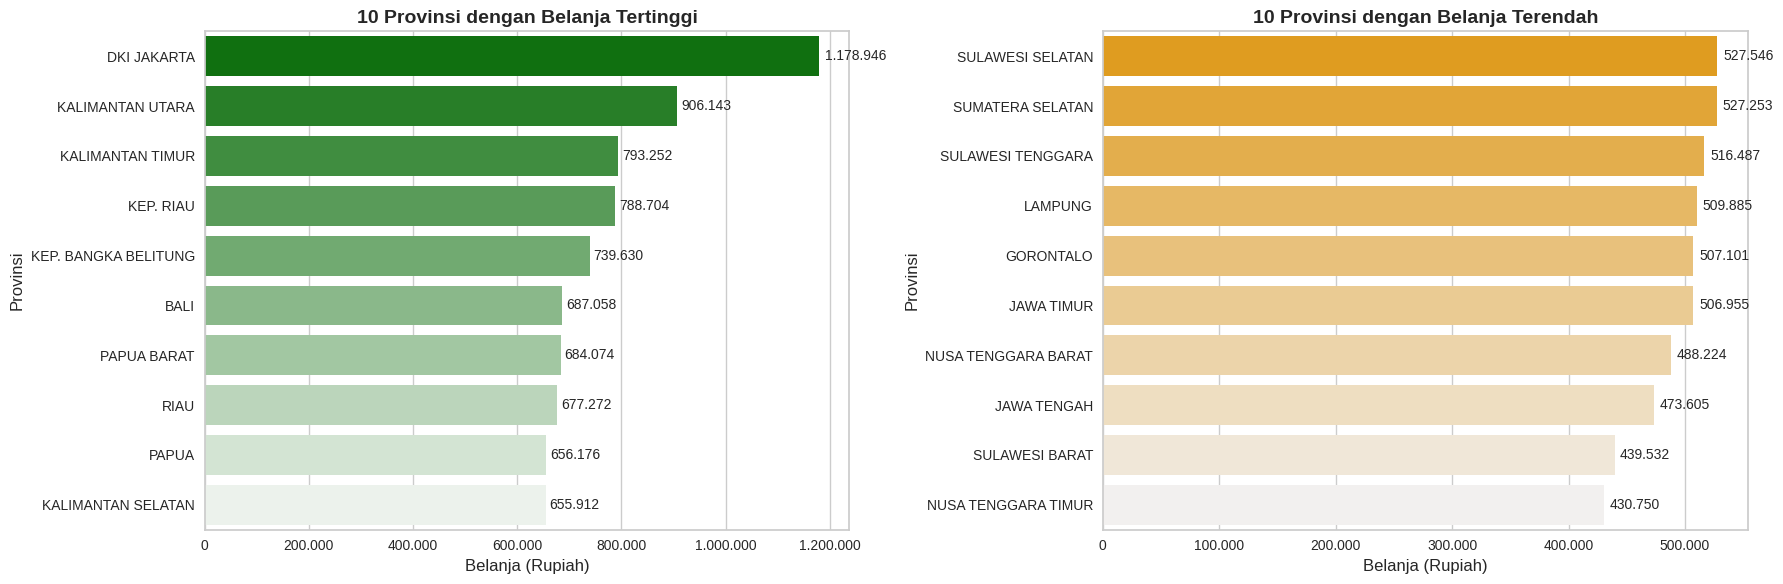

In [11]:
# Calculate average 'pengeluaran' for each 'provinsi'
pengeluaran_provinsi = df.groupby('provinsi')['belanja'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=False)

# Top 10 provinsi dengan Belanja tertinggi (dengan gradasi hijau)
sns.barplot(y=pengeluaran_provinsi.head(10).index,
            x=pengeluaran_provinsi.head(10).values,
            ax=axes[0],
            palette=sns.light_palette("green", n_colors=10, reverse=True))  # Palet hijau
axes[0].set_title("10 Provinsi dengan Belanja Tertinggi", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Belanja (Rupiah)", fontsize=12)
axes[0].set_ylabel("Provinsi", fontsize=12)
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Tambahkan label angka di atas batang
for i, v in enumerate(pengeluaran_provinsi.head(10).values):
    axes[0].text(v + (v * 0.01), i, f"{int(v):,}".replace(",", "."), va='center', fontsize=10)

# Top 10 provinsi dengan Belanja terendah (dengan gradasi oranye)
sns.barplot(y=pengeluaran_provinsi.tail(10).index,
            x=pengeluaran_provinsi.tail(10).values,
            ax=axes[1],
            palette=sns.light_palette("orange", n_colors=10, reverse=True))  # Palet oranye
axes[1].set_title("10 Provinsi dengan Belanja Terendah", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Belanja (Rupiah)", fontsize=12)
axes[1].set_ylabel("Provinsi", fontsize=12)
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Tambahkan label angka di atas batang
for i, v in enumerate(pengeluaran_provinsi.tail(10).values):
    axes[1].text(v + (v * 0.01), i, f"{int(v):,}".replace(",", "."), va='center', fontsize=10)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [12]:
print(df['provinsi'].unique())  # Melihat daftar unik dalam kolom provinsi
print(df[df['provinsi'] == 'INDONESIA'])  # Melihat data yang memiliki 'INDONESIA'

['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']
       provinsi              daerah    jenis  tahun    belanja
4488  INDONESIA           PERDESAAN  MAKANAN   2007   148613.0
4489  INDONESIA           PERDESAAN  MAKANAN   2008   166583.0
4490  INDONESIA           PERDESAAN  MAKANAN   2009   186741.0
4491  INDONESIA           PERDESAAN  MAKANAN   2010   219803.0
4492  INDONESIA           PERDESAAN  MAKANAN   2011   254926.0
...         ...                 ...      ...    ...        ...
4615  INDONESIA  PERDESAANPERK

In [13]:
df = df[df['provinsi'] != 'INDONESIA']

In [14]:
# Mengisi missing values dengan median
df['belanja'] = df['belanja'].fillna(df['belanja'].median())

# Mengecek missing values
display(df.isnull().sum())

<ipython-input-14-22f73932007a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['belanja'] = df['belanja'].fillna(df['belanja'].median())


,0
provinsi,0
daerah,0
jenis,0
tahun,0
belanja,0


In [15]:
# Mendeteksi baris duplikat dalam DataFrame
data_duplikat = df[df.duplicated()]

# Menampilkan baris duplikat
print(f"Jumlah data duplikat: {data_duplikat.shape[0]}")
print(data_duplikat)

Jumlah data duplikat: 0
Empty DataFrame
Columns: [provinsi, daerah, jenis, tahun, belanja]
Index: []


In [16]:
# Menggunakan StandardScaler untuk normalisasi z-score
# Define numerical_cols
numerical_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(
    df[numerical_cols]
)

# Menampilkan 5 data pertama setelah normalisasi
print("\nData setelah normalisasi:")
print(df.head())


Data setelah normalisasi:
  provinsi     daerah    jenis     tahun   belanja
0     ACEH  PERDESAAN  MAKANAN -1.822033 -1.159356
1     ACEH  PERDESAAN  MAKANAN -1.595566 -1.091759
2     ACEH  PERDESAAN  MAKANAN -1.369098 -1.009726
3     ACEH  PERDESAAN  MAKANAN -1.142631 -0.928621
4     ACEH  PERDESAAN  MAKANAN -0.916164 -0.836265


<ipython-input-16-ce15cf067871>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = scaler.fit_transform(


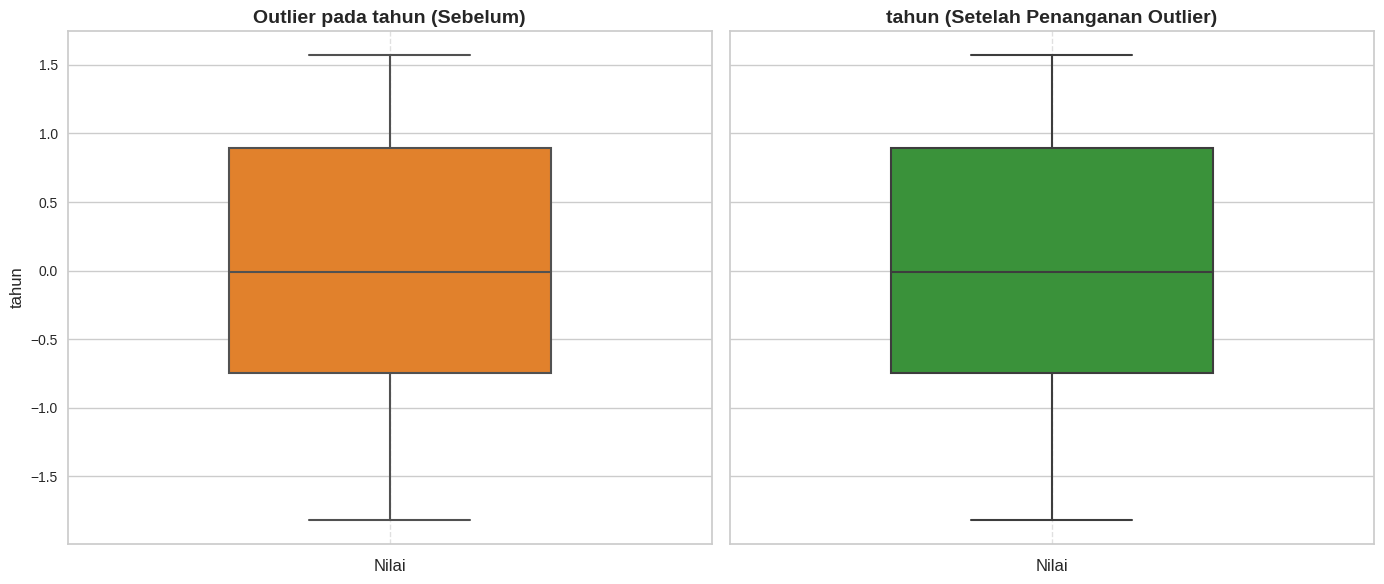

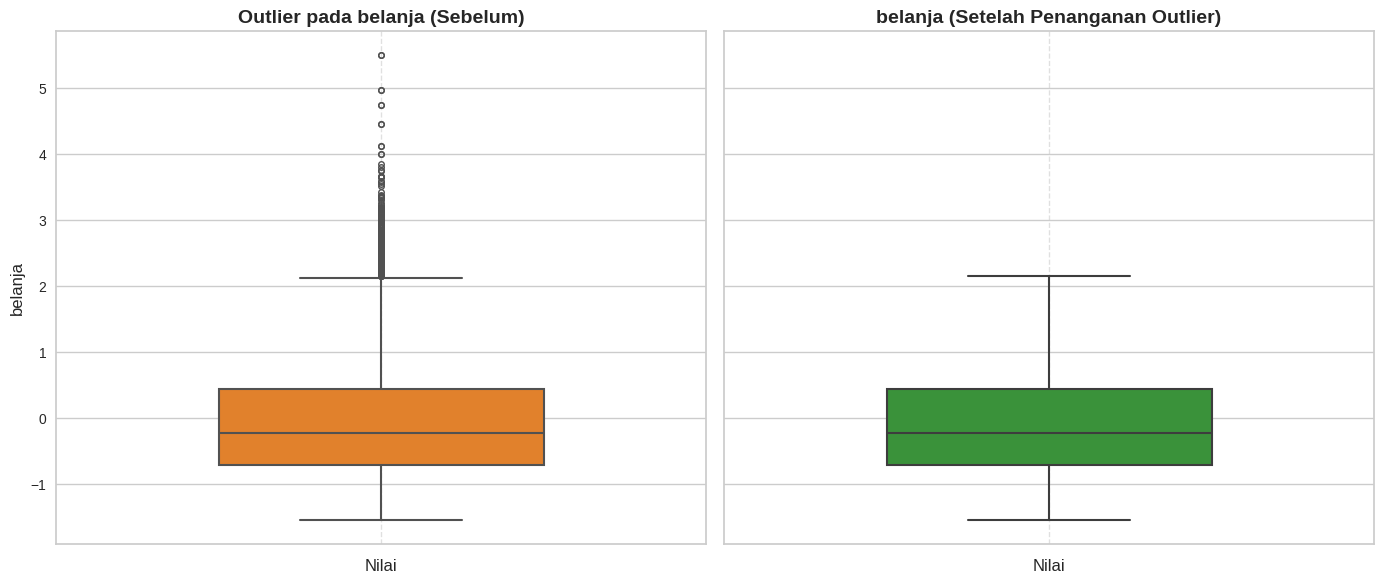

In [17]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Fungsi untuk menangani outlier menggunakan IQR
def handle_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengatasi outlier dengan mengganti nilai di luar batas dengan batas atas/bawah
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Salin data untuk perbandingan sebelum dan sesudah
df_original = df.copy()
df_cleaned = df.copy()

# Tangani outlier untuk setiap kolom numerik
for col in numerical_cols:
    df_cleaned = handle_outliers(df_cleaned, col)

# Visualisasi perbandingan sebelum dan sesudah
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Boxplot sebelum penanganan outlier
    sns.boxplot(data=df_original, y=col, color='#ff7f0e', ax=axes[0], width=0.5, fliersize=4, linewidth=1.5)
    axes[0].set_title(f'Outlier pada {col} (Sebelum)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel(col, fontsize=12)
    axes[0].set_xlabel('Nilai', fontsize=12)
    axes[0].grid(axis='x', linestyle='--', alpha=0.6)

    # Boxplot setelah penanganan outlier
    sns.boxplot(data=df_cleaned, y=col, color='#2ca02c', ax=axes[1], width=0.5, fliersize=4, linewidth=1.5)
    axes[1].set_title(f'{col} (Setelah Penanganan Outlier)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Nilai', fontsize=12)
    axes[1].grid(axis='x', linestyle='--', alpha=0.6)

    # Tampilkan visualisasi
    plt.tight_layout()
    plt.show()

In [18]:
# Inisialisasi dictionary untuk menyimpan encoder
encoders = {}

# Get categorical columns before filtering
categorical_cols = df.select_dtypes(include=['object']).columns

# Label Encoding untuk kolom kategorikal
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Membuat salinan dataframe hasil preprocessing
df_normalized = df.copy()

In [19]:
# Membuat kategori belanja dengan binning
bins = [df["belanja"].min(),
        df["belanja"].quantile(0.25),  # Q1
        df["belanja"].quantile(0.50),  # Median (Q2)
        df["belanja"].quantile(0.75),  # Q3
        df["belanja"].max() + 1]

labels = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]

# Proses binning menggunakan pd.cut()
df_normalized['belanja_kategori'] = pd.cut(
    df_normalized['belanja'],
    bins=bins,
    labels=labels,
    right=False
)

# Encoding kategori belanja
label_encoder_kategori = LabelEncoder()
df_normalized['belanja_kategori'] = label_encoder_kategori.fit_transform(
    df_normalized['belanja_kategori']
)

# Menampilkan hasil akhir tanpa kolom belanja_kategori_encoded
print("\nData setelah binning belanja:")
print(df_normalized)


Data setelah binning belanja:
      provinsi  daerah  jenis     tahun   belanja  belanja_kategori
0            0       0      0 -1.822033 -1.159356                 0
1            0       0      0 -1.595566 -1.091759                 0
2            0       0      0 -1.369098 -1.009726                 0
3            0       0      0 -1.142631 -0.928621                 0
4            0       0      0 -0.916164 -0.836265                 0
...        ...     ...    ...       ...       ...               ...
4483        23       1      2  0.669108  1.502484                 1
4484        23       1      2  0.895576  1.760280                 1
4485        23       1      2  1.122043  2.032318                 1
4486        23       1      2  1.348510  2.200315                 1
4487        23       1      2  1.574978  2.446422                 1

[4488 rows x 6 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [20]:
# Gunakan kolom 'tahun' dan 'belanja' sebagai fitur
X = df_normalized[['tahun', 'belanja']].values

# Tampilkan data fitur yang akan digunakan
print("Data yang digunakan untuk clustering:")
print(pd.DataFrame(X, columns=['tahun', 'belanja']))

# Bangun model KMeans dengan 3 cluster
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(X)
labels = kmeans_model.labels_

Data yang digunakan untuk clustering:
         tahun   belanja
0    -1.822033 -1.159356
1    -1.595566 -1.091759
2    -1.369098 -1.009726
3    -1.142631 -0.928621
4    -0.916164 -0.836265
...        ...       ...
4483  0.669108  1.502484
4484  0.895576  1.760280
4485  1.122043  2.032318
4486  1.348510  2.200315
4487  1.574978  2.446422

[4488 rows x 2 columns]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

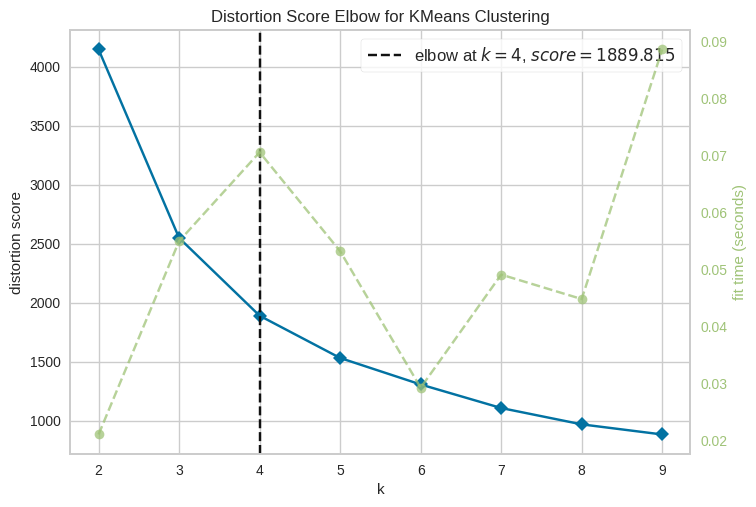

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
kmeans_elbow = KMeans(random_state=0)
visualizer = KElbowVisualizer(
    kmeans_elbow,
    k=(2, 10)
)
visualizer.fit(X)
optimal_k_elbow = visualizer.elbow_value_

visualizer.show()

Silhouette Score untuk k=2: 0.466
Silhouette Score untuk k=3: 0.455
Silhouette Score untuk k=4: 0.400
Silhouette Score untuk k=5: 0.408
Silhouette Score untuk k=6: 0.369
Silhouette Score untuk k=7: 0.365
Silhouette Score untuk k=8: 0.374
Silhouette Score untuk k=9: 0.357


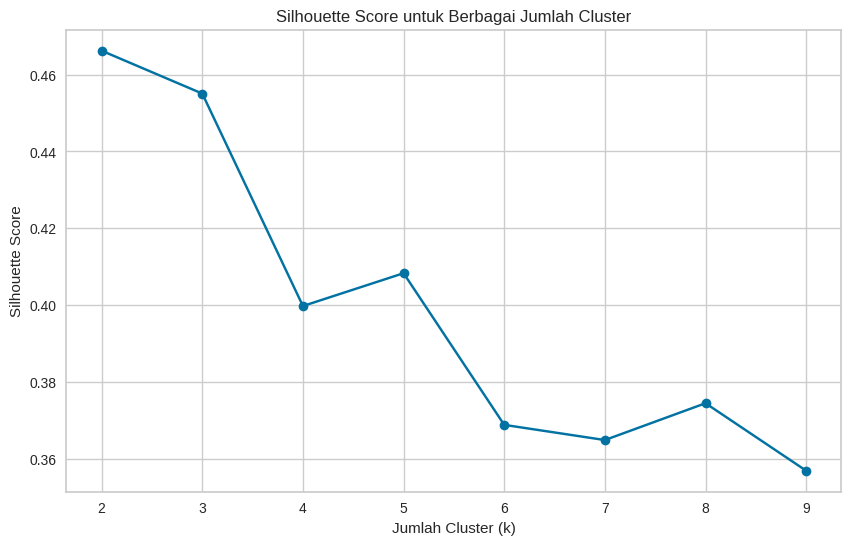

In [22]:
silhouette_scores = []
max_silhouette_score = -float('inf')

for k in range(2, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=0)
    labels_temp = kmeans_temp.fit_predict(X)
    score = silhouette_score(X, labels_temp)
    silhouette_scores.append(score)

    print(f"Silhouette Score untuk k={k}: {score:.3f}")

    if score > max_silhouette_score:
        max_silhouette_score = score

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [23]:
# Mengambil semua fitur dari dataset yang sudah dinormalisasi,
features = df_normalized.select_dtypes(include=['number']).columns

X_full = df_normalized[features].values

pca = PCA(
    n_components=0.95,
    random_state=0
)
X_pca = pca.fit_transform(X_full)

print(f"\nJumlah fitur asli: {X_full.shape[1]}, setelah PCA: {X_pca.shape[1]}")


Jumlah fitur asli: 6, setelah PCA: 1


In [24]:
# Inisialisasi model KMeans dengan jumlah cluster optimal dari Elbow Method
kmeans_pca = KMeans(
    n_clusters=optimal_k_elbow,
    random_state=0
)

kmeans_pca.fit(X_pca)

labels_pca = kmeans_pca.labels_

In [25]:
# Menghitung Silhouette Score untuk model dengan data hasil PCA
score_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score dengan feature selection (PCA): {score_pca:.3f}")

# Membandingkan dengan performa model asli (tanpa PCA)
score_original = max_silhouette_score  # Silhouette Score model asli
print(f"Silhouette Score model asli: {score_original:.3f}")

Silhouette Score dengan feature selection (PCA): 0.577
Silhouette Score model asli: 0.466


In [26]:
# Optimasi jumlah komponen PCA
best_score = 0
best_n_components = 0

for n in range(2, X_full.shape[1]+1):
    pca = PCA(n_components=n, random_state=0)
    X_pca = pca.fit_transform(X_full)

    # Optimasi jumlah cluster untuk PCA ini
    for k in range(2, 6):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        labels = kmeans.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)

        if score > best_score:
            best_score = score
            best_n_components = n
            best_k = k

print(f"Best Silhouette Score: {best_score:.3f}")
print(f"Optimal n_components: {best_n_components}")
print(f"Optimal n_clusters: {best_k}")

Best Silhouette Score: 0.603
Optimal n_components: 2
Optimal n_clusters: 2


In [27]:
pca = PCA(n_components=best_n_components)
X_pca = pca.fit_transform(X_full)

gmm = GaussianMixture(n_components=best_k, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X_pca)
gmm_score = silhouette_score(X_pca, gmm_labels)

print(f"\nGMM with PCA Silhouette Score: {gmm_score:.3f}")


GMM with PCA Silhouette Score: 0.601


In [28]:
# Hasil DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca)

# 1. Hitung frekuensi tiap cluster (abaikan noise -1)
cluster_counts = Counter(labels_dbscan)
cluster_counts.pop(-1, None)  # Hapus noise jika ada

# 2. Ambil 3 cluster terbesar
top_3_clusters = [cluster for cluster, _ in cluster_counts.most_common(3)]

# 3. Buat mask untuk 3 cluster terbaik
mask = np.isin(labels_dbscan, top_3_clusters)

# 4. Data dan label untuk 3 cluster terbaik
X_top3 = X_pca[mask]
labels_top3 = labels_dbscan[mask]

# 5. Relabel ke 0,1,2
unique_labels = np.unique(labels_top3)
relabel_mapping = {old: new for new, old in enumerate(unique_labels)}
labels_final = np.vectorize(relabel_mapping.get)(labels_top3)

# 6. Hitung silhouette score
score = silhouette_score(X_top3, labels_final)
print(f"3 Cluster terbaik: {unique_labels}")
print(f"Jumlah anggota: {Counter(labels_final)}")
print(f"Silhouette Score: {score:.3f}")

3 Cluster terbaik: [0 1 2]
Jumlah anggota: Counter({np.int64(0): 132, np.int64(1): 132, np.int64(2): 132})
Silhouette Score: 0.602


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

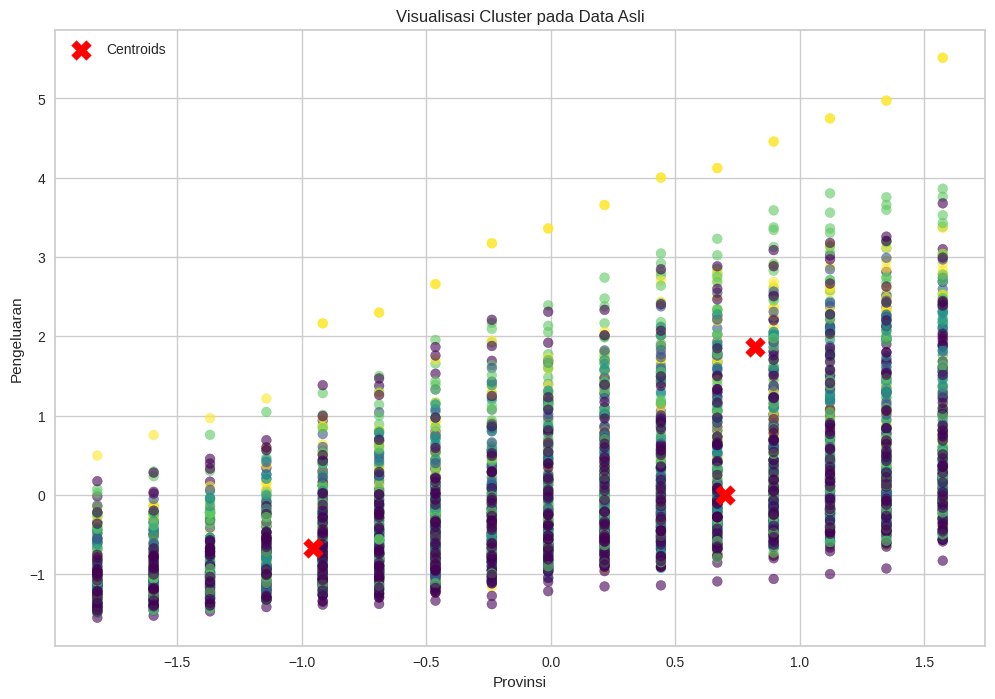

In [29]:
# Menampilkan hasil clustering dalam bentuk visualisasi
plt.figure(figsize=(12, 8))

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.6
)

centroids = kmeans_model.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)

plt.title('Visualisasi Cluster pada Data Asli')
plt.xlabel('Provinsi')
plt.ylabel('Pengeluaran')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [30]:
# 1. Tambahkan Hasil Label Cluster ke DataFrame
df_normalized['cluster'] = kmeans_model.labels_

df_original = df_normalized.copy()

In [31]:
# Inverse transform untuk data numerik (misalnya, 'tahun' dan 'belanja')
df_original[['tahun', 'belanja']] = scaler.inverse_transform(df_normalized[['tahun', 'belanja']])

for col in categorical_cols:
    # Pastikan kolom yang di-inverse transform hanya yang asli, bukan kolom hasil clustering
    df_original[col] = encoders[col].inverse_transform(df_normalized[col])

df_original['belanja_kategori'] = label_encoder_kategori.inverse_transform(df_normalized['belanja_kategori'])

print("Data asli setelah inverse transform:")
print(df_original.head())

Data asli setelah inverse transform:
  provinsi     daerah    jenis   tahun   belanja belanja_kategori  cluster
0     ACEH  PERDESAAN  MAKANAN  2007.0  195176.0           Rendah        2
1     ACEH  PERDESAAN  MAKANAN  2008.0  218781.0           Rendah        2
2     ACEH  PERDESAAN  MAKANAN  2009.0  247427.0           Rendah        2
3     ACEH  PERDESAAN  MAKANAN  2010.0  275749.0           Rendah        2
4     ACEH  PERDESAAN  MAKANAN  2011.0  308000.0           Rendah        2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [32]:
df_original[['tahun', 'belanja']] = scaler.inverse_transform(df_normalized[['tahun', 'belanja']])

cSetelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [33]:
# Mengelompokkan data berdasarkan kolom 'cluster' dan menghitung statistik deskriptif
cluster_stats = df_original.groupby('cluster')[['tahun', 'belanja']].agg(
    ['mean', 'median', 'std']  # Menghitung mean, median, dan standar deviasi
)

# Menampilkan hasil statistik deskriptif
print("Statistik Deskriptif per Cluster:")
print(cluster_stats)

Statistik Deskriptif per Cluster:
               tahun                         belanja                          
                mean  median       std          mean     median            std
cluster                                                                       
0        2018.666667  2019.0  2.662248  1.252633e+06  1191909.0  262770.151911
1        2018.154180  2018.0  2.418943  6.023411e+05   589403.5  157749.031496
2        2010.840491  2011.0  2.308245  3.676297e+05   339143.5  166765.358297


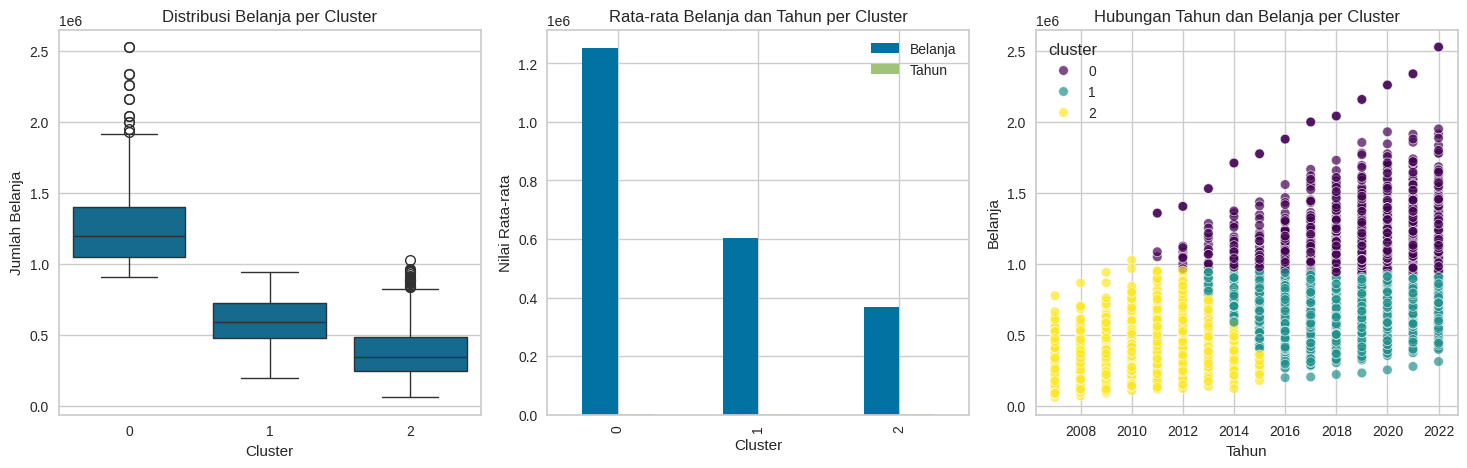

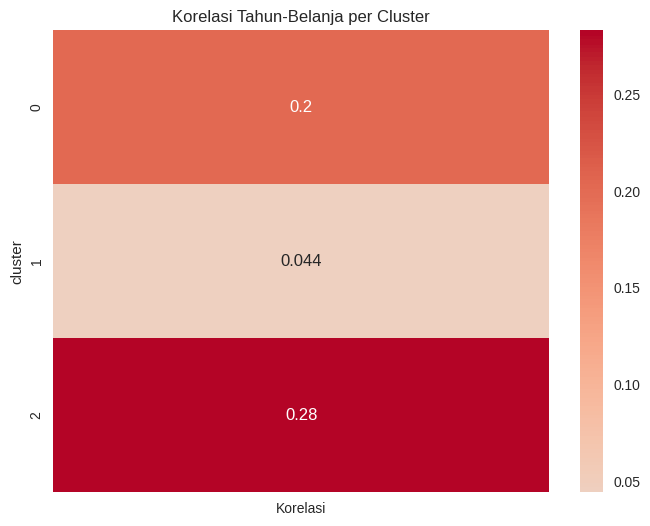

In [34]:
# 1. Boxplot Perbandingan Belanja per Cluster
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_original, x='cluster', y='belanja')
plt.title('Distribusi Belanja per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Belanja')

# 2. Barplot Rata-rata Belanja dan Tahun
plt.subplot(1, 3, 2)
cluster_means = df_original.groupby('cluster')[['belanja', 'tahun']].mean()
cluster_means.plot(kind='bar', ax=plt.gca())
plt.title('Rata-rata Belanja dan Tahun per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nilai Rata-rata')
plt.legend(['Belanja', 'Tahun'])

# 3. Scplot Hubungan Tahun vs Belanja
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_original, x='tahun', y='belanja', hue='cluster',
                palette='viridis', alpha=0.7)
plt.title('Hubungan Tahun dan Belanja per Cluster')
plt.xlabel('Tahun')
plt.ylabel('Belanja')

plt.tight_layout()
plt.show()

# 4. Heatmap Korelasi (Opsional)
plt.figure(figsize=(8, 6))
cluster_corr = df_original.groupby('cluster')[['tahun', 'belanja']].corr().unstack().iloc[:, 1]
sns.heatmap(cluster_corr.to_frame('Korelasi'), annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Tahun-Belanja per Cluster')
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 1:
- Rata-rata tahun: 2018-2019
- Rata-rata belanja: 1.252.633
- Analisis: Cluster ini menunjukkan kelompok dengan tingkat belanja tertinggi dan aktivitas paling baru. Individu atau rumah tangga dalam cluster ini kemungkinan memiliki daya beli kuat dan cenderung melakukan pembelian dalam jumlah besar.

2. Cluster 2:
- Rata-rata tahun: 2018
- Rata-rata belanja: 602.341
- Analisis: Cluster ini merepresentasikan kelompok dengan belanja menengah yang stabil. Mereka menunjukkan pola konsumsi yang teratur dengan nilai belanja cukub baik.

3. Cluster 3:
- Rata-rata tahun: 2010-2011
- Rata-rata belanja: 367.629
- Analisis: Cluster ini memiliki rata-rata pengeluaran terendah, yang menunjukkan bahwa individu atau rumah tangga dalam kelompok ini lebih hemat atau memiliki daya beli yang lebih terbatas dibandingkan cluster lainnya.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
df_original.to_csv('Dataset_hasil_Clustering.csv', index=False)
print("Data telah diekspor ke 'Dataset_hasil_Clustering.csv'")

Data telah diekspor ke 'Dataset_hasil_Clustering.csv'
